# EDA Norwegian

In [1]:
import pkg_resources
import subprocess
import sys
import os
import pandas as pd



import nltk
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt 
from textblob import TextBlob
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = '/Users/vildearntzen/Desktop/master_kode/master_kode/data/'

In [3]:
no = pd.read_csv(PATH + 'no_full_dataset.csv')
dk = pd.read_csv(PATH + "dk_full_dataset.csv")
display(no.head(2))
display(dk.head(2))

,id,text,category,source,offensive_3_5,hateful,cleaned,offensive_2_5,offensive,text_@user,cleaned_@user
0,4519,Navn Navn: menerdu at AP svikter Norge? Å sitt...,1,fb,0,-1,Navn Navn: menerdu at AP svikter Norge? Å sitt...,0,0,Navn Navn: menerdu at AP svikter Norge? Å sitt...,Navn Navn: menerdu at AP svikter Norge? Å sitt...
1,4185,Hvor mange er det som ikke har TV og samtidig ...,2,fb,0,0,Hvor mange er det som ikke har TV og samtidig ...,1,1,Hvor mange er det som ikke har TV og samtidig ...,Hvor mange er det som ikke har TV og samtidig ...


,text,english,uid,source,a,b,c,offensive,hateful,cleaned,translatepy_no,easynmt_no_opus-mt,easynmt_no_m2m_100_418M,easynmt_no_m2m_100_1.2B,translatepy,opus-mt,418M,1.2B,text_@user,cleaned_@user
0,Skyd for helvede. Afliv lortet !!! Tænk dog på...,Shoot for hell. Kill off the shit !!! Think of...,e8jf1hj,Reddit Comments r/Denmark,OFF,UNT,NOT,1,0,Skyd for helvede. Afliv lortet !! Tænk dog på ...,Skyt til helvete. Drep dritten !! Tenk imidler...,Skyt på helvete. Avlivet lortet! Men tenk på h...,Skyt for helvete. Slapp av skjæret! Tenk på hv...,Skyt for helvete. Fjern dette drittet! Tenk på...,Skyt til helvete. Drep dritten !! Tenk imidler...,Skyt på helvete. Avlivet lortet! Men tenk på h...,Skyt for helvete. Slapp av skjæret! Tenk på hv...,Skyt for helvete. Fjern dette drittet! Tenk på...,Skyd for helvede. Afliv lortet !!! Tænk dog på...,Skyd for helvede. Afliv lortet !! Tænk dog på ...
1,Satans danskjävlar!,Satan Danskjävlar!,chj198l,Reddit Comments r/Danmag,OFF,TIN,GRP,1,1,Satans danskjävlar!,Satans dansebastarder!,Satans danskjävlar!,Satans jävlar!,Djevelens jævler!,Satans dansebastarder!,Satans danskjävlar!,Satans jävlar!,Djevelens jævler!,Satans danskjävlar!,Satans danskjävlar!


## Wordclouds

In [4]:
stopwords = set(nltk.corpus.stopwords.words('norwegian'))
stopwords.add('vet')
stopwords.add('vel')
stopwords.add('jo')
stopwords.add('mer')
stopwords.add('nei')
stopwords.add('ja')
stopwords.add('altså')
stopwords.add('gang')
stopwords.add('se')
stopwords.add('flere')
stopwords.add('igjen')
stopwords.add('få')
stopwords.add('gi')
stopwords.add('får')
stopwords.add('hele')
stopwords.add('fikk')
stopwords.add('ser')
stopwords.add('fått')
stopwords.add('en')
stopwords.add('to')
stopwords.add('heller')
stopwords.add('gå')
stopwords.add('gir')
stopwords.add('tar')
stopwords.add('all')
stopwords.add('går')
stopwords.add('komme')
stopwords.add('kommer')
stopwords.add('e')
stopwords.add('is')
stopwords.add('nok')
stopwords.add('la')
stopwords.add('ei')
stopwords.add('mulig')
stopwords.add('del')
stopwords.add('tilbake')
stopwords.add('gjøre')
stopwords.add('gjorde')
stopwords.add('tatt')
stopwords.add('ta')
stopwords.add('må')
stopwords.add('slike')
stopwords.add('bør')
stopwords.add('burde')
stopwords.add('sier')
stopwords.add('te')
stopwords.add('r')
stopwords.add('gjør')
stopwords.add('finne')

### Neutral

In [5]:
from PIL import Image, ImageColor

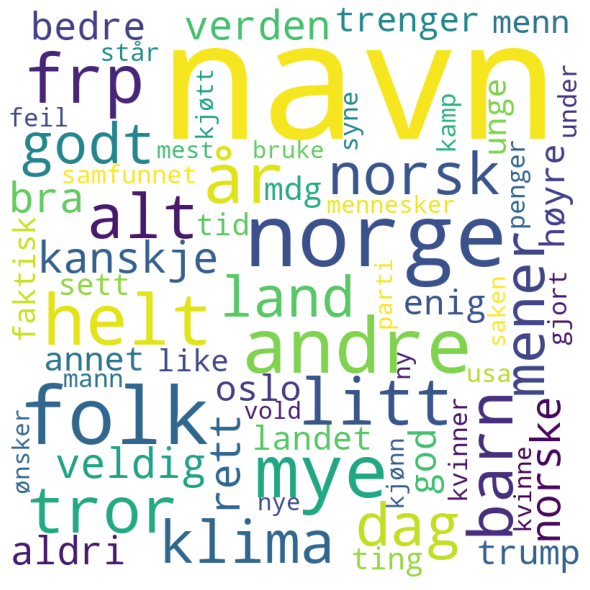

In [6]:
df = no[no.category == 1]
comment_words = '' 

for val in df.cleaned: 

    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 75,
                stopwords = stopwords,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                collocations = False,
                min_font_size = 29).generate(comment_words) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('neutral.png')
  
plt.show() 

### Provocative

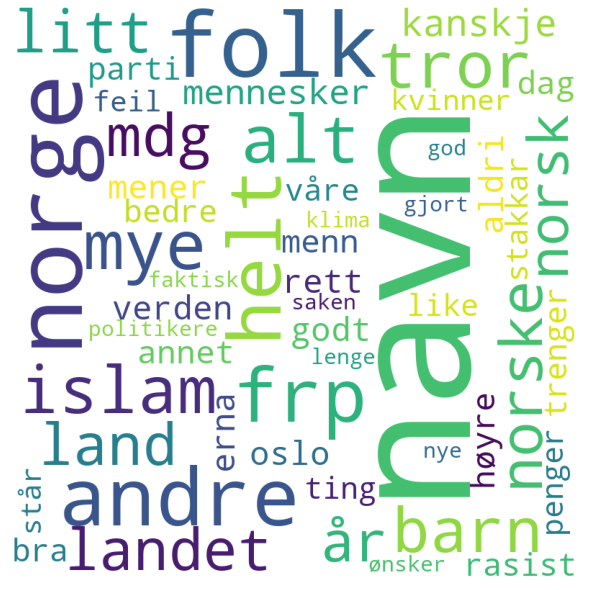

In [7]:
df = no[no.category == 2]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 75,
                collocations = False,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                min_font_size = 25).generate(comment_words) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('provocative.png')
  
plt.show() 

### Offensive

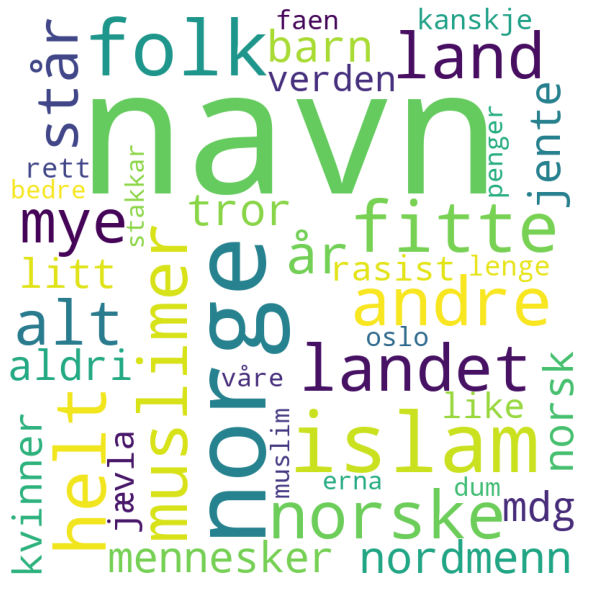

In [8]:
df = no[no.category == 3]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        if tokens[i][0] == '#':
            tokens[i] = tokens[i][1:]
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 75,
                collocations = False,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                min_font_size = 25).generate(comment_words) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('offensive.png')
  
plt.show() 

### Moderately Hateful

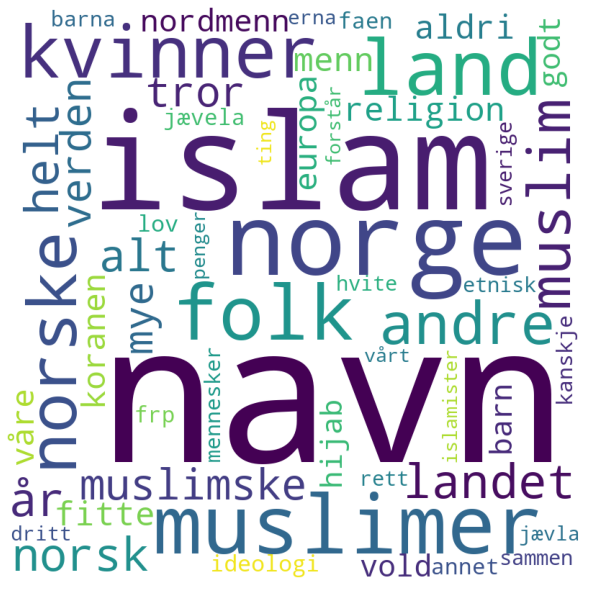

In [9]:
df = no[no.category == 4]
comment_words = '' 

for val in df.cleaned: 
    
    val = str(val) 
  
    tokens = val.split() 

    for i in range(len(tokens)): 
        if tokens[i][0] == '#':
            tokens[i] = tokens[i][1:]
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words = 75,
                collocations = False,
                stopwords = stopwords, 
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                min_font_size = 25).generate(comment_words) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('mod_hateful.png')
plt.show() 

### Hateful

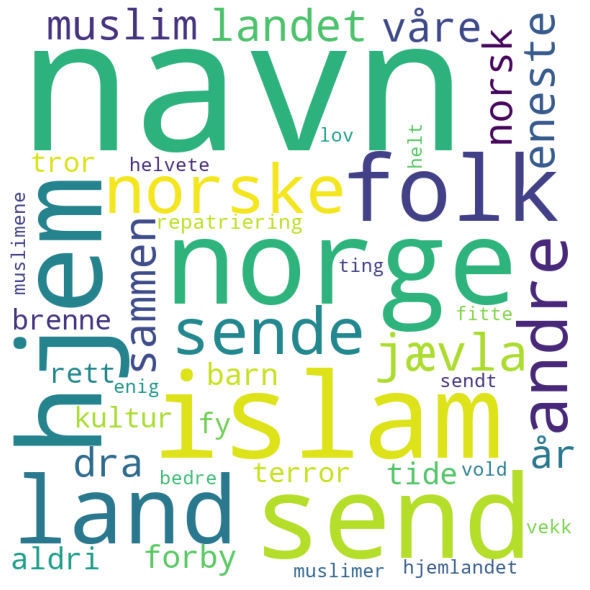

In [197]:
df = no[no.category == 5]
comment_words = '' 

for val in df.cleaned: 

    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        if tokens[i][0] == '#':
            tokens[i] = tokens[i][1:]
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 75,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                collocations = False,
                min_font_size = 25).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('hateful.png')
  
plt.show() 

### Category 2-5

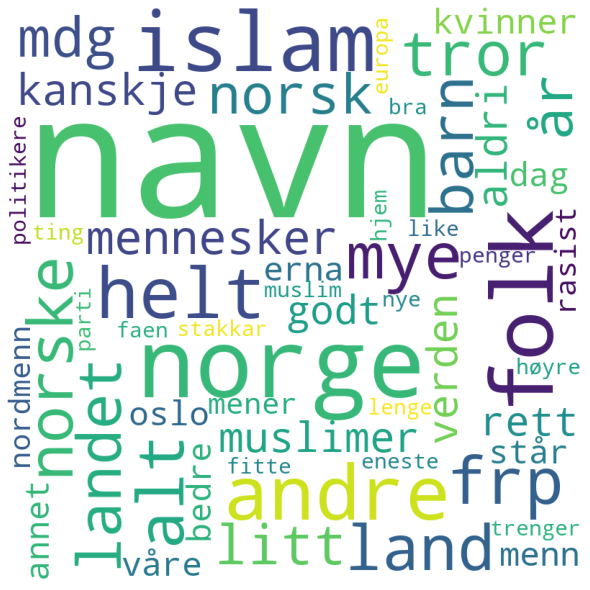

In [133]:
df = no[no.category > 1]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        if tokens[i][0] == '#':
            tokens[i] = tokens[i][1:]
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 70,
                collocations = False,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                min_font_size = 30).generate(comment_words) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
off = no[no.category > 1]

# Tester features

In [203]:
no['navn_count'] = no['text'].str.count('Navn')
no['#_count']= no['text'].str.lower().str.findall(r'#.*?(?=\s|$)').apply(len)
no['hashtags'] = no['text'].str.lower().str.findall(r'#.*?(?=\s|$)')

In [204]:
no.head()

,id,text,category,source,offensive_3_5,hateful,cleaned,offensive_2_5,offensive,text_@user,cleaned_@user,navn_count,#_count,hashtags
0,4519,Navn Navn: menerdu at AP svikter Norge? Å sitt...,1,fb,0,-1,Navn Navn: menerdu at AP svikter Norge? Å sitt...,0,0,Navn Navn: menerdu at AP svikter Norge? Å sitt...,Navn Navn: menerdu at AP svikter Norge? Å sitt...,2,0,[]
1,4185,Hvor mange er det som ikke har TV og samtidig ...,2,fb,0,0,Hvor mange er det som ikke har TV og samtidig ...,1,1,Hvor mange er det som ikke har TV og samtidig ...,Hvor mange er det som ikke har TV og samtidig ...,0,0,[]
2,6469,"En konklusjon mot bedre vitende, fra en fyr so...",2,fb,0,0,"En konklusjon mot bedre vitende, fra en fyr so...",1,1,"En konklusjon mot bedre vitende, fra en fyr so...","En konklusjon mot bedre vitende, fra en fyr so...",0,0,[]
3,674,Gleder meg til dagen!😁😁🤘🏼,1,fb,0,-1,Gleder meg til dagen!😁😁🤘🏼,0,0,Gleder meg til dagen!😁😁🤘🏼,Gleder meg til dagen!😁😁🤘🏼,0,0,[]
4,7955,Etter 2 verdenskrig ble det sagt at Tyskland a...,3,fb,1,0,Etter 2 verdenskrig ble det sagt at Tyskland a...,1,1,Etter 2 verdenskrig ble det sagt at Tyskland a...,Etter 2 verdenskrig ble det sagt at Tyskland a...,0,0,[]


In [15]:
len(no[no['#_count'] > 0])

2118

In [14]:
len(no)

41145

## Danish

In [26]:
dk.head(2)

,text,english,uid,source,a,b,c,offensive,hateful,cleaned,translatepy_no,easynmt_no_opus-mt,easynmt_no_m2m_100_418M,easynmt_no_m2m_100_1.2B,translatepy,opus-mt,418M,1.2B,text_@user,cleaned_@user
0,Skyd for helvede. Afliv lortet !!! Tænk dog på...,Shoot for hell. Kill off the shit !!! Think of...,e8jf1hj,Reddit Comments r/Denmark,OFF,UNT,NOT,1,0,Skyd for helvede. Afliv lortet !! Tænk dog på ...,Skyt til helvete. Drep dritten !! Tenk imidler...,Skyt på helvete. Avlivet lortet! Men tenk på h...,Skyt for helvete. Slapp av skjæret! Tenk på hv...,Skyt for helvete. Fjern dette drittet! Tenk på...,Skyt til helvete. Drep dritten !! Tenk imidler...,Skyt på helvete. Avlivet lortet! Men tenk på h...,Skyt for helvete. Slapp av skjæret! Tenk på hv...,Skyt for helvete. Fjern dette drittet! Tenk på...,Skyd for helvede. Afliv lortet !!! Tænk dog på...,Skyd for helvede. Afliv lortet !! Tænk dog på ...
1,Satans danskjävlar!,Satan Danskjävlar!,chj198l,Reddit Comments r/Danmag,OFF,TIN,GRP,1,1,Satans danskjävlar!,Satans dansebastarder!,Satans danskjävlar!,Satans jävlar!,Djevelens jævler!,Satans dansebastarder!,Satans danskjävlar!,Satans jävlar!,Djevelens jævler!,Satans danskjävlar!,Satans danskjävlar!


In [112]:
stopwords = set(nltk.corpus.stopwords.words('danish'))
stopwords.add("kan")
stopwords.add("så")
stopwords.add("se")
stopwords.add("the")
stopwords.add("bare")
stopwords.add("of")
stopwords.add("kommer")
stopwords.add("is")
stopwords.add("kun")
stopwords.add("in")
stopwords.add("mere")
stopwords.add("ved")
stopwords.add("to")
stopwords.add("må")
stopwords.add("vore")
stopwords.add("lad")
stopwords.add("kom")
stopwords.add("vel")
stopwords.add("ingen")
stopwords.add("ellers")
stopwords.add("få")
stopwords.add("nok")
stopwords.add("ser")
stopwords.add("igjen")
stopwords.add("går")
stopwords.add("får")
stopwords.add("fordi")
stopwords.add("flere")
stopwords.add("igjen")
stopwords.add("ww")
stopwords.add("finde")
stopwords.add("igjen")
stopwords.add("andre")
stopwords.add("hele")
stopwords.add("ja")
stopwords.add("gør")
stopwords.add("lidt")
stopwords.add("altså")
stopwords.add("like")
stopwords.add("nej")
stopwords.add("helt")
stopwords.add("samme")
stopwords.add("gøre")
stopwords.add("gang")
stopwords.add("hold")
stopwords.add("ret")
stopwords.add("siger")
stopwords.add("siden")
stopwords.add("ingen")
stopwords.add("heller")
stopwords.add("første")
stopwords.add("før")
stopwords.add("lige")
stopwords.add("nogen")
stopwords.add("komme")
stopwords.add("eneste")
stopwords.add("hvordan")
stopwords.add("andet")
stopwords.add("http")
stopwords.add("com")
stopwords.add("jpg")
stopwords.add("imgur")
stopwords.add("www")
stopwords.add("https")
stopwords.add("vores")
stopwords.add("år")
stopwords.add("stadig")

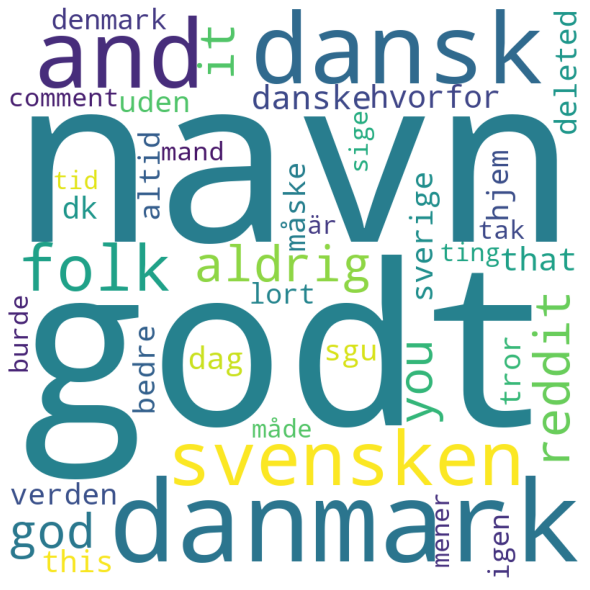

In [113]:
df = dk[no.offensive == 0]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 75,
                stopwords = stopwords,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                collocations = False,
                min_font_size = 29.5).generate(comment_words) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('dk_neutral.png')
  
plt.show() 

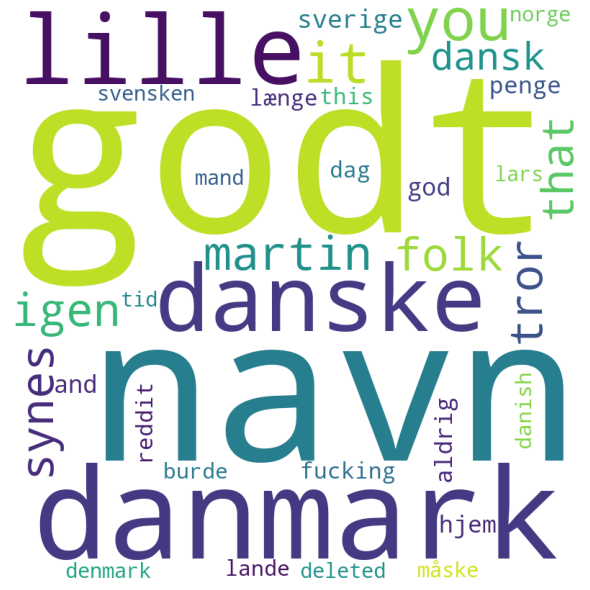

In [114]:
df = dk[no.offensive == 1]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 75,
                stopwords = stopwords,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                collocations = False,
                min_font_size = 29).generate(comment_words) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('dk_offensive.png')
  
plt.show() 

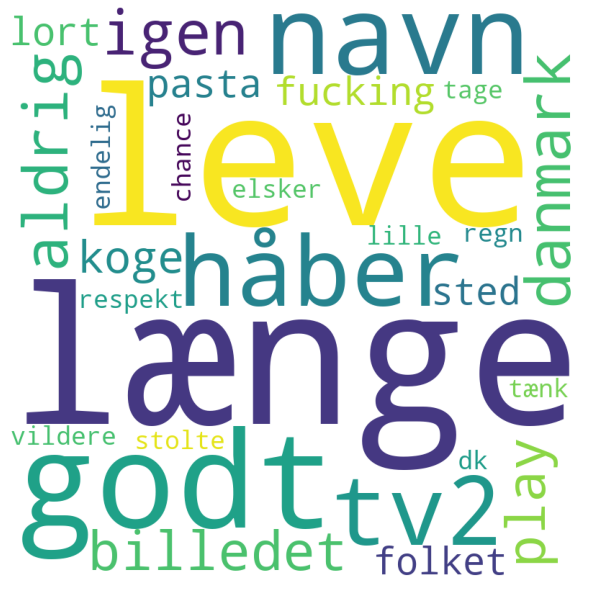

In [116]:
df = dk[no.hateful == 1]
comment_words = '' 

for val in df.cleaned: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 75,
                stopwords = stopwords,
                regexp = r"(\w[\w']+|#[a-zA-Z]+\b)",
                collocations = False,
                min_font_size = 28.5).generate(comment_words) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('dk_hateful.png')
  
plt.show() 

## Distribution Plot

In [229]:
noff = no[no.category == 1].sample(n = 250)
off = no[no.category == 5]
sample = pd.concat([off, noff])

In [230]:
len(off)

250

In [231]:
len(noff)

250

In [232]:
strSer = no.cleaned.str
txtBlob = sample["text"].apply(lambda s: TextBlob(s))

sample['sentence_len'] = strSer.len()
sample['word_count'] = strSer.split().apply(lambda ls: len(ls))

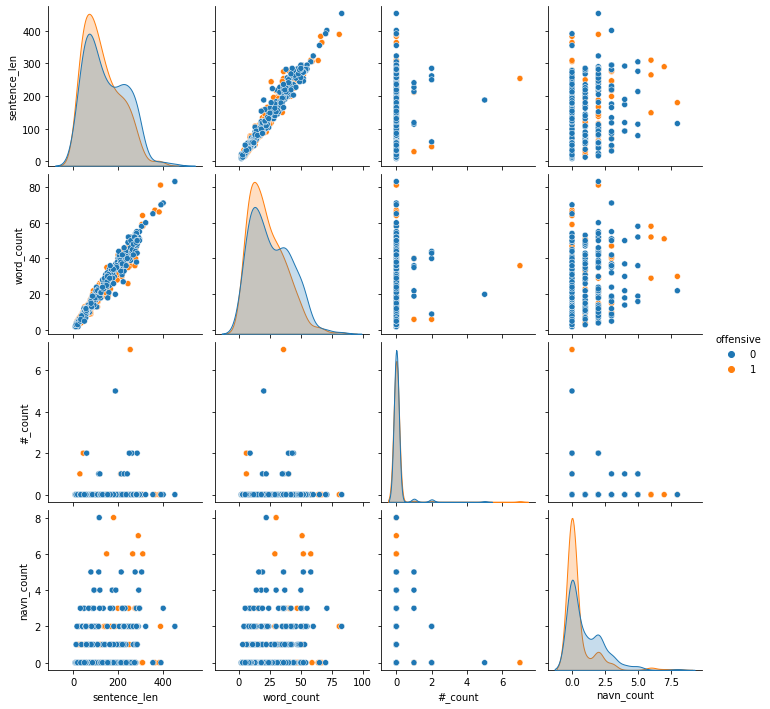

In [233]:

sns.pairplot(
  sample[['sentence_len', 'word_count', 'offensive', '#_count', 'navn_count']], 
  hue="offensive"
)